In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt


In [2]:
digit_data = datasets.load_digits()

image_features = digit_data.images.reshape((len(digit_data.images), -1))
image_targets = digit_data.target

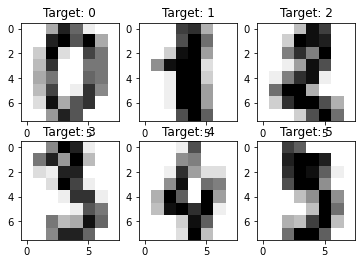

In [3]:
images_and_label = list(zip(digit_data.images, digit_data.target))

for index, (image, label) in enumerate(images_and_label[:6]):
    plt.subplot(2, 3, index + 1)  # 2 row, 3 column, plot image and label
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')  # gray scale image
    plt.title('Target: %i' % label)
plt.show()

In [4]:
image_features.shape

(1797, 64)

In [5]:
random_forest_model = RandomForestClassifier(n_jobs=-1, max_features='auto')

x_train, x_test, y_train, y_test = train_test_split(image_features, image_targets, test_size=0.2)


In [17]:
param_grid = {
    "n_estimators": [50, 100, 200, 300, 400],
    "max_depth": [8, 9, 10, 11, 12, 13],
    "min_samples_leaf": [1, 2, 3, 5, 10]
}

'''

param_grid = {
    "n_estimators": [10, 100, 500, 1000],
    "max_depth": [1, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 10, 15, 30, 50]
}
'''

'\n\nparam_grid = {\n    "n_estimators": [10, 100, 500, 1000],\n    "max_depth": [1, 5, 10, 15],\n    "min_samples_leaf": [1, 2, 4, 10, 15, 30, 50]\n}\n'

In [18]:
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, n_jobs = -1, cv = 5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [8, 9, 10, 11, 12, 13],
                         'min_samples_leaf': [1, 2, 3, 5, 10],
                         'n_estimators': [50, 100, 200, 300, 400]})

In [19]:
print(grid_search.best_params_)

optimal_estimator = grid_search.best_params_.get("n_estimators")
optimal_depth = grid_search.best_params_.get("max_depth")
optimal_leaf = grid_search.best_params_.get("min_samples_leaf")

print(optimal_leaf, optimal_depth, optimal_estimator)

{'max_depth': 12, 'min_samples_leaf': 1, 'n_estimators': 400}
1 12 400


In [20]:
train_grid_prediction = grid_search.predict(x_train)
test_grid_prediction = grid_search.predict(x_test)

print(confusion_matrix(y_train, train_grid_prediction))
print(accuracy_score(y_train, train_grid_prediction))
print(accuracy_score(y_test, test_grid_prediction))

[[137   0   0   0   0   0   0   0   0   0]
 [  0 150   0   0   0   0   0   0   0   0]
 [  0   0 142   0   0   0   0   0   0   0]
 [  0   0   0 148   0   0   0   0   0   0]
 [  0   0   0   0 149   0   0   0   0   0]
 [  0   0   0   0   0 134   0   0   0   0]
 [  0   0   0   0   0   0 148   0   0   0]
 [  0   0   0   0   0   0   0 151   0   0]
 [  0   0   0   0   0   0   0   0 136   0]
 [  0   0   0   0   0   0   0   0   0 142]]
1.0
0.9805555555555555


In [21]:
param_grid = {
    "max_depth": [i for i in range(5, 15)],
    "min_samples_leaf": [1, 2, 3, 5, 10]
}

decision_tree = DecisionTreeClassifier(max_features='auto')

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, n_jobs = -1, cv = 5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_features='auto'),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [1, 2, 3, 5, 10]})

In [22]:
print(grid_search.best_params_)

optimal_depth = grid_search.best_params_.get("max_depth")
optimal_leaf = grid_search.best_params_.get("min_samples_leaf")

print(optimal_leaf, optimal_depth)

{'max_depth': 12, 'min_samples_leaf': 1}
1 12


In [23]:
train_dt_pred = grid_search.predict(x_train)
test_dt_pred = grid_search.predict(x_test)

print(confusion_matrix(y_train, train_dt_pred))
print(accuracy_score(y_train, train_dt_pred))
print(accuracy_score(y_test, test_dt_pred))

[[137   0   0   0   0   0   0   0   0   0]
 [  0 150   0   0   0   0   0   0   0   0]
 [  0   0 141   0   0   0   1   0   0   0]
 [  0   0   0 147   0   0   0   0   0   1]
 [  0   0   0   0 149   0   0   0   0   0]
 [  0   0   0   0   0 133   0   0   0   1]
 [  0   0   0   0   0   0 148   0   0   0]
 [  0   0   0   0   0   0   0 151   0   0]
 [  0   0   0   0   0   1   0   0 135   0]
 [  0   0   0   0   0   0   0   1   1 140]]
0.9958246346555324
0.8166666666666667
